** We will conduct EDA and predict sales prices for houses based upon different parameters. The dataset for this notebook can be downloaded here from the Kaggle(https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). **

** Let's call all our libraries for data exploration, data visualization and statistical modelling. **

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Now let's read our dataset as housing. **

In [4]:
housing = pd.read_csv('HousingPrices.csv')

In [5]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


** It seems this is a huge dataset and we should know what all columns we have, to understand what to keep and what to drop with the first glance of our dataset. **

In [6]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

** There are 79 columns in our dataset. Do you think they all are important? To understand that whether we should keep a certain column or not, we need to answer quick questions about each of them. For example: **

**1.Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its 'Masonry veneer type'?).**

**2.If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).**

**3.Is this information already described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).**

**Going through all the parameters, we think, two 'building' variables ('OverallQual' and 'YearBuilt') and two 'space' variables ('TotalBsmtSF' and 'GrLivArea') are few of the mpsot important variables in deciding the prices of the house.**


# Analyzing 'Sale Price'

**Our main objective is to calculate the SalePrice. Before we start exploring the data, let's understand the basic statistical features of our dependent variable. **

In [8]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

** A quick distribution plot will help us visualize the 'SalePrice' column more. **

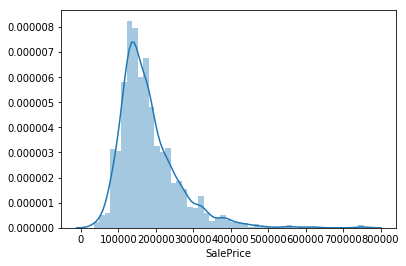

In [9]:
sns.distplot(housing['SalePrice']);

** Now this is interesting, we have our dependent variable right/poitive skewed and has a peak value too between range 100,000 and 200,000. **

In [10]:
print("Skewness: %f" % housing['SalePrice'].skew())
print("Kurtosis: %f" % housing['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


** Definitely 'SalePrice' is influenced by the other parameters. Let's start exploring our relation with the four parameters we listed above. We will use seaborn to visualize these relations because a picture always describe the best scenario to human eye.**

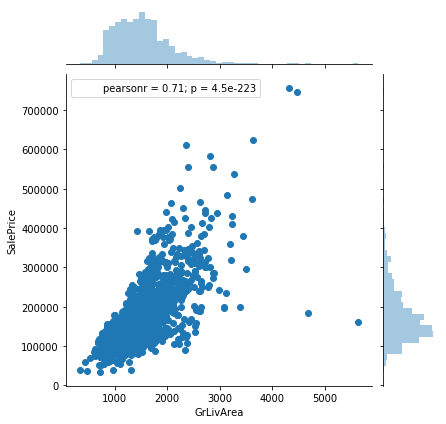

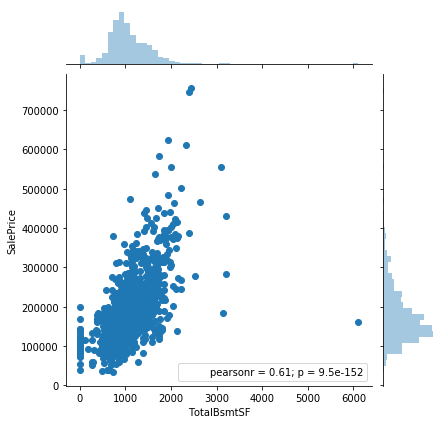

In [13]:
sns.jointplot(x='GrLivArea',y='SalePrice',data=housing,kind='scatter')
sns.jointplot(x='TotalBsmtSF',y='SalePrice',data=housing,kind='scatter')



** And as per our previous calculations, the scatter plots here shows that 'GrLivArea' and 'TotalBsmtSF' have almost linear relationship with our dependent variable 'SalePrice' and have been playing very major role in deciding our house prices from a long time. **

** Ok. Now let's talk about 'OverallQual' column. Though it is calculated internally, but definitely it has a strong relation with our 'SalePrice'. Let's make a boxplot between them to understand their bonding. **

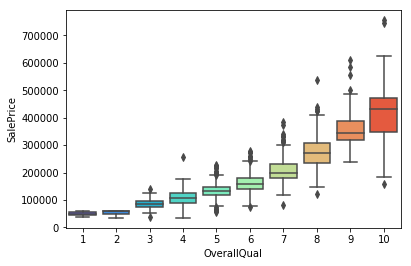

In [14]:
sns.boxplot(x="OverallQual", y="SalePrice", data=housing,palette='rainbow')

** And our "SalePrice" increases with "OverallQual".**

**What about the "YearBuilt"? Definitely we have a tendency to spend more in the houses which our constructed recently. Let's check if our dataset is behaving in the same patter or not. A boxplot would be best again to show this relation. **

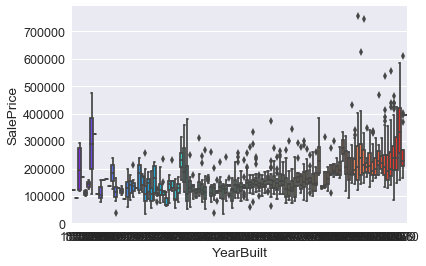

In [47]:
sns.boxplot(x="YearBuilt", y="SalePrice", data=housing,palette='rainbow')


** And we can see that our dataset behaves as we thought, "SalePrice" increases for the properties recently built.**

** But do you think are these four features enough to build our model for prediction of "SalePrice". We need to make sure that we are not missing out on important things and we select the right features to define our solution. Let's do a more objective analysis by building correlation matrix(heatmap matrix). **

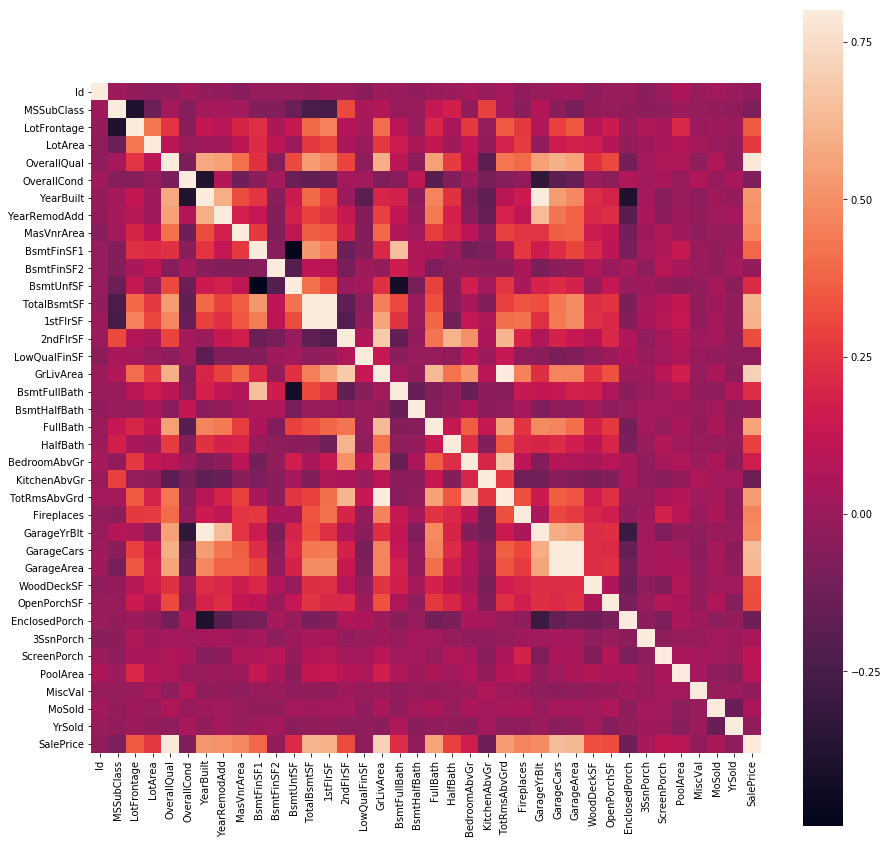

In [24]:
corrmat= housing.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

** This is too huge. We need to narrow it down. Let's make a zoomed style heatmap for our 'SalePrice' by picking up the 10 variable with which our 'SalePrice' has the strongest correlation.**

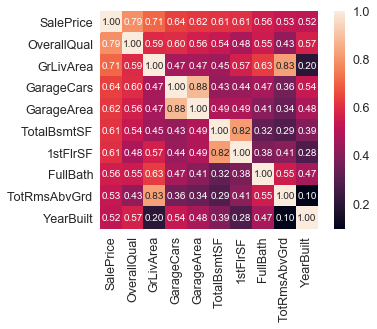

In [50]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**These are the variables most correlated with 'SalePrice'.**

** 1.'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Already checked!**

**2.'GarageCars' and 'GarageArea' are also strongly correlated variables. However,the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers.Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).**

**3.'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right.**

**4'FullBath'**

**5.'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.**

**'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'.**

**Let's proceed to the scatter plots.**

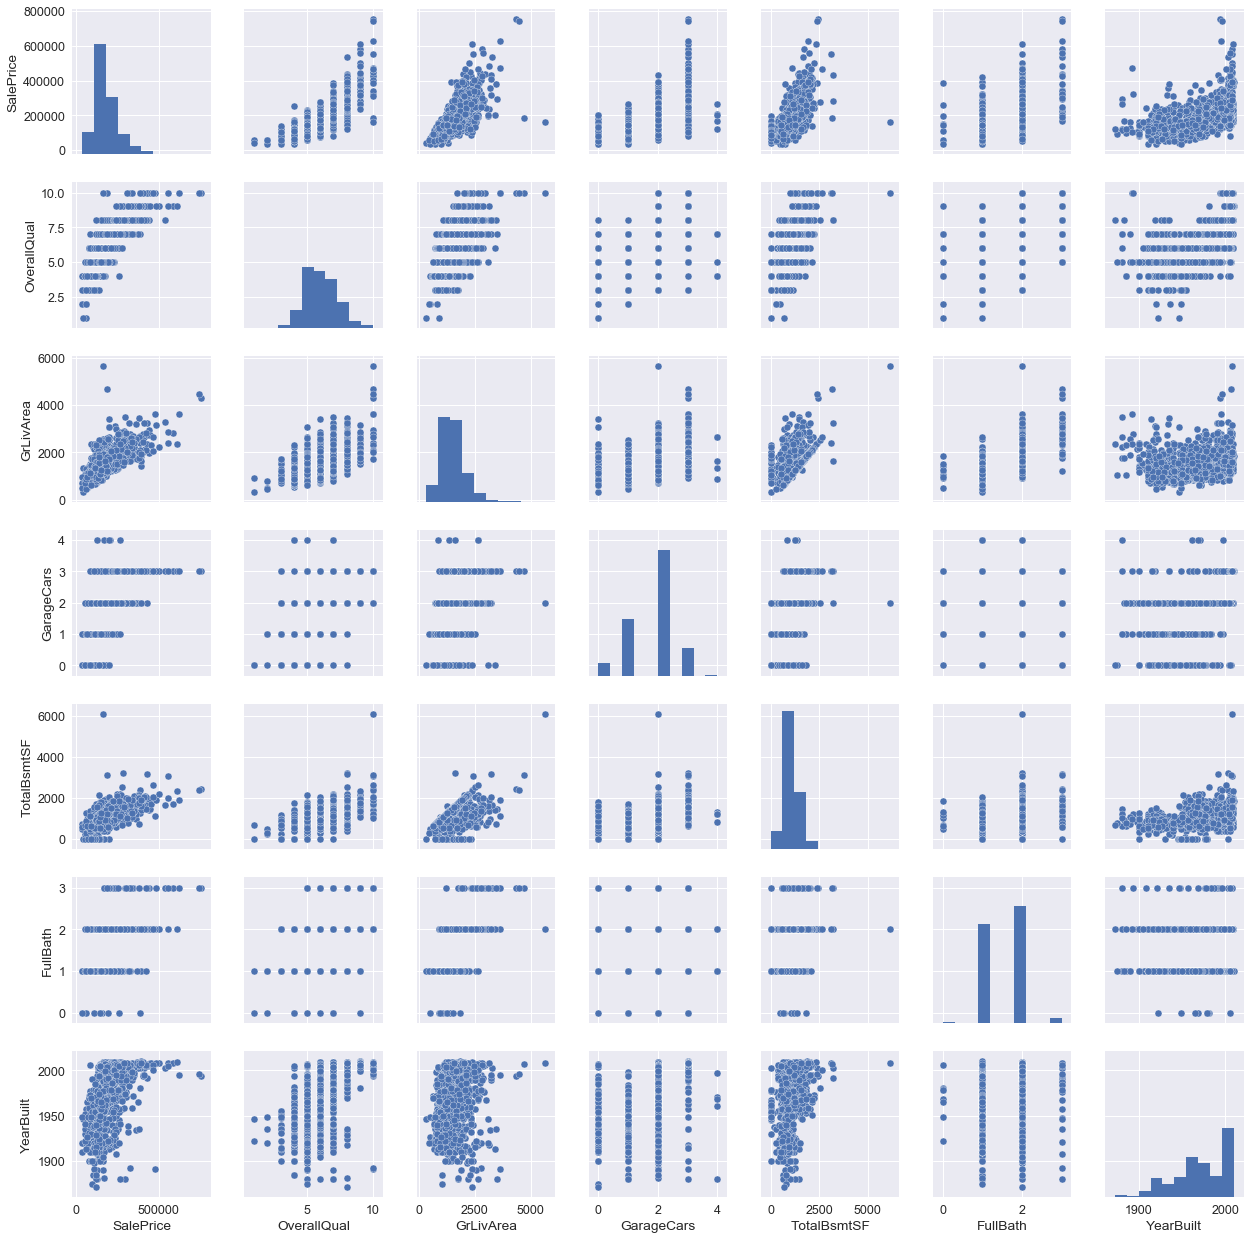

In [39]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[cols])

**And this gives us the same picture again. Now let's move ahead and understand what to do with our missing data.**

### Missing Data

** Now, it is important to understand how much missing data we have and how we can fill it, so that it does not create a problem in our modelling.**

In [51]:
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


**We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.**

**We can see that 'GarageX' variables have the same number of missing data.Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.**

**Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.**

** Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.**

**In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.**

In [53]:
#dealing with missing data
housing = housing.drop((missing_data[missing_data['Total'] > 1]).index,1)
housing  = housing.drop(housing.loc[housing['Electrical'].isnull()].index)
housing.isnull().sum().max() #just checking that there's no missing data missing...

0

**Now let's try to figure out the normality of our 'SalePrice'.**

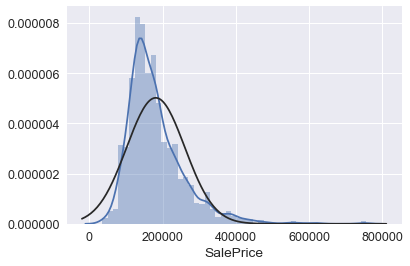

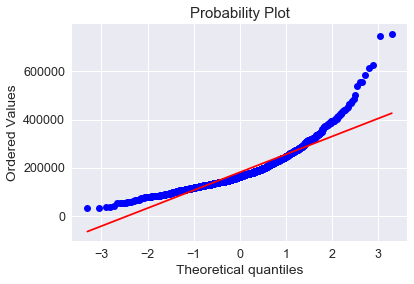

In [55]:
#histogram and normal probability plot
sns.distplot(housing['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(housing['SalePrice'], plot=plt)

**Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.**

**But everything's not lost. A simple data transformation can solve the problem. I learnt it in my data models and decision making curriculum that in case of positive skewness, log transformations usually works well.**

In [56]:
#applying log transformation
housing['SalePrice'] = np.log(housing['SalePrice'])

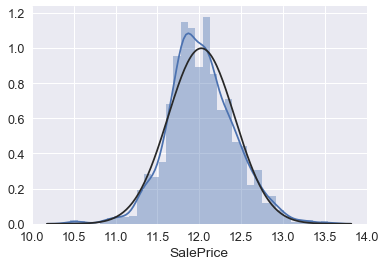

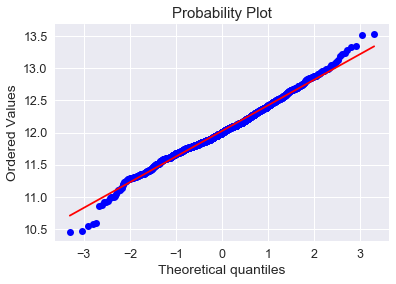

In [57]:
#transformed histogram and normal probability plot
sns.distplot(housing['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(housing['SalePrice'], plot=plt)

**This was easy. Now let's check out our 'GrLivArea' & 'TotalBsmtSF' and understand if it requires some transformation.**

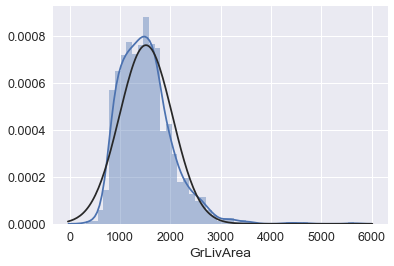

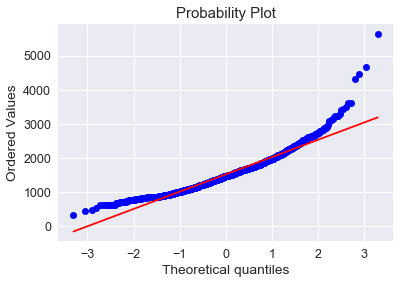

In [58]:
#histogram and normal probability plot
sns.distplot(housing['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(housing['GrLivArea'], plot=plt)

In [60]:
#data transformation
housing['GrLivArea'] = np.log(housing['GrLivArea'])

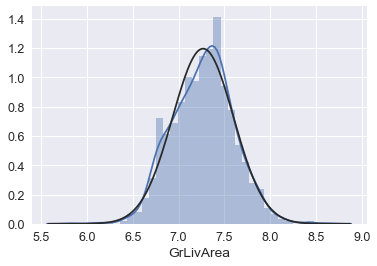

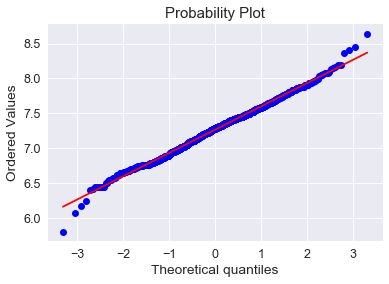

In [61]:
#transformed histogram and normal probability plot
sns.distplot(housing['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(housing['GrLivArea'], plot=plt)

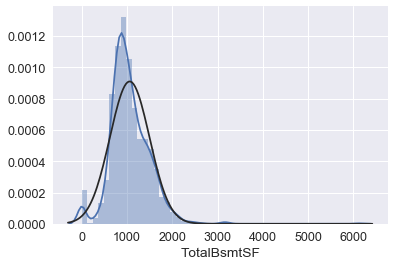

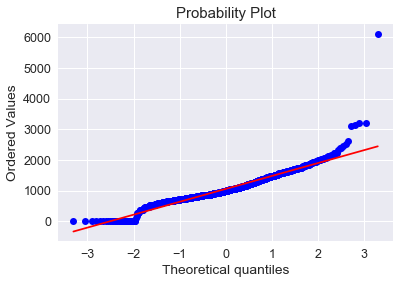

In [64]:
#histogram and normal probability plot
sns.distplot(housing['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(housing['TotalBsmtSF'], plot=plt)


**This case is different. We cannot do the transformation into log directly because there are lot of values at zero which have to be adjusted or spearated before we transform. Let's change this.**

In [66]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
housing['HasBsmt'] = pd.Series(len(housing['TotalBsmtSF']), index=housing.index)
housing['HasBsmt'] = 0 
housing.loc[housing['TotalBsmtSF']>0,'HasBsmt'] = 1


In [68]:
#transform data
housing.loc[housing['HasBsmt']==1,'TotalBsmtSF'] = np.log(housing['TotalBsmtSF'])

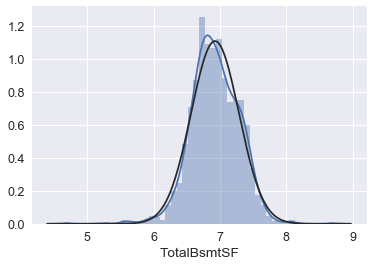

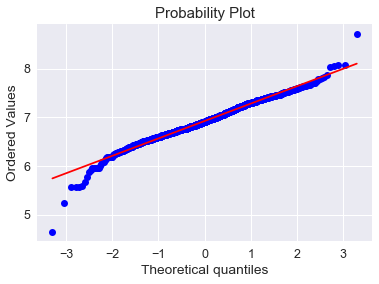

In [69]:
#histogram and normal probability plot
sns.distplot(housing[housing['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(housing[housing['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

**Now let's check our scatter plots again for these two transformed variables and see if the transformation has changed the shape. **

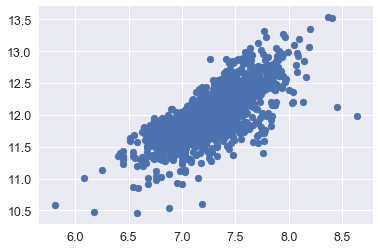

In [70]:
#scatter plot
plt.scatter(housing['GrLivArea'], housing['SalePrice']);

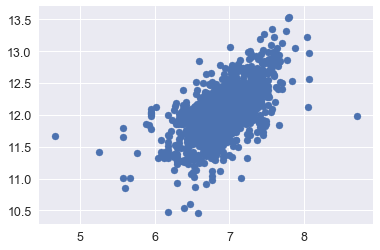

In [72]:
#scatter plot
plt.scatter(housing[housing['TotalBsmtSF']>0]['TotalBsmtSF'], housing[housing['TotalBsmtSF']>0]['SalePrice']);

**Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.**

**Creating dummy variables.**

In [73]:
#convert categorical variable into dummy
housing = pd.get_dummies(housing)

In [74]:
housing

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0


In [75]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 223 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(187)
memory usage: 728.2 KB


In [77]:
housing.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=223)

### Modeling

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
#split the data to train the model
X_train,X_test,y_train,y_test = train_test_split(housing.drop('SalePrice', axis=1),housing['SalePrice'],test_size = 0.3,random_state= 0)

In [95]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1021, 222), (438, 222), (1021,), (438,))

In [93]:
X_train.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1454,1455,20,7500,7,5,2004,2005,410,0,811,...,0,0,0,1,0,0,0,0,1,0
1099,1100,20,11880,7,5,1978,1978,704,0,567,...,0,0,0,0,1,0,0,0,0,0
416,417,60,7844,6,7,1978,1978,209,0,463,...,0,0,0,1,0,0,0,0,1,0


**Defining cross_val_score function for both train and test sets separately. **

In [104]:
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(housing.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(housing.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

**Linear model without Regularization.**

In [105]:
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on train',rmse_CV_test(lr).mean())

rmse on train 0.144112707412
rmse on train 0.186072184813


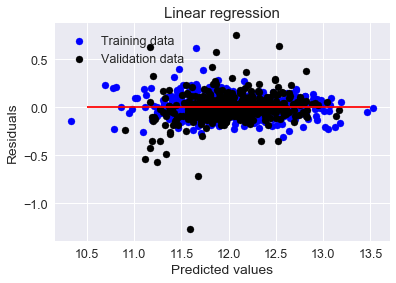

In [106]:
#plot between predicted values and residuals
plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre,test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

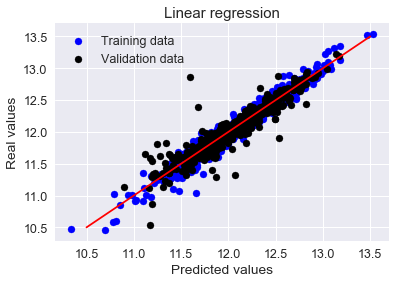

In [107]:
# Plot predictions - Real values
plt.scatter(train_pre, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

**Regularization is a very useful method to handle collinearity, filter out noise from data, and eventually prevent overfitting.
The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter weights.**

In [108]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('best alpha',alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
print("Ridge RMSE on Training set :", rmse_CV_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_CV_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

best alpha 0.6
Try again for more precision with alphas centered around 0.6
Best alpha : 0.36
Ridge RMSE on Training set : 0.144297688225
Ridge RMSE on Test set : 0.129869085316


In [109]:
X_train.shape

(1021, 222)

In [110]:
coef = pd.Series(ridge.coef_, index = X_train.columns)

print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 212 variables and eliminated the other 10 variables


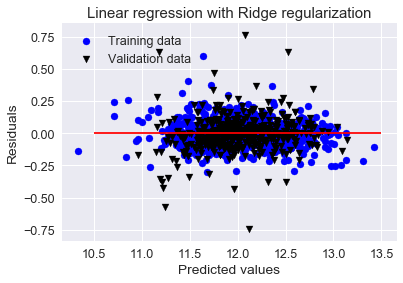

In [111]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue",  label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "black", marker = "v", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

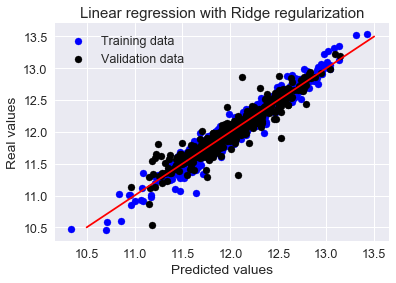

In [112]:
# Plot predictions - Real values
plt.scatter(y_train_rdg, y_train, c = "blue",  label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

I will keep updating this space in future!